# DEEP LEARNING WITH PYTHON
## _FROM TABULAR TO MULTIMEDIA_

### UniFr Winter School in Data Analytics & Machine Learning
Fribourg, 14-16 February 2024

with [Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Setup
--> "Runtime" --> "Change runtime type" --> "GPU" hardware accelerator

## Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
seed = 10
np.random.seed(seed)

# Handwritten Digit Recognition Dataset

## Description

- The dataset was constructed from a number of scanned document datasets available from the _National Institute of Standards and Technology (NIST)_. This is where the name for the dataset
comes from, as the _Modified NIST_ or [_MNIST_ dataset](http://yann.lecun.com/exdb/mnist/).

- Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

- Each image is a 28 x 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60'000 images are used to train a model and a separate set of 10'000 images are used to test it.

- It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict.

- Results are reported using prediction error, which is nothing more than the inverted classification accuracy.

- Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. State-of-the-art results and links to the relevant papers on the MNIST and
other datasets are listed [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"
alt="drawing" width="700"/>

[MedMNIST](https://www.nature.com/articles/s41597-022-01721-8)

## Load Data

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


In [18]:
for r in range(X_train[0].shape[0]):
  for c in range(X_train[0].shape[1]):
    print(str(X_train[0][r][c]).zfill(3), end=' ')
  print()

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 003 018 018 018 126 136 175 026 166 255 247 127 000 000 000 000 
000 000 000 000 000 000 000 000 030 036 094 154 170 253 253 253 253 253 225 172 253 242 195 064 000 000 000 000 
000 000 000 000 000 000 000 049 238 253 253 253 253 253 253 253 253 251 093 082 082 056 039 000 000 000 000 000 
000 000 000 000 000 000 000 018 219 253 253 253 253 253 198 182 247 241 000 000 000 000 000 000 

In [19]:
print(y_train[0])

5


## Preview

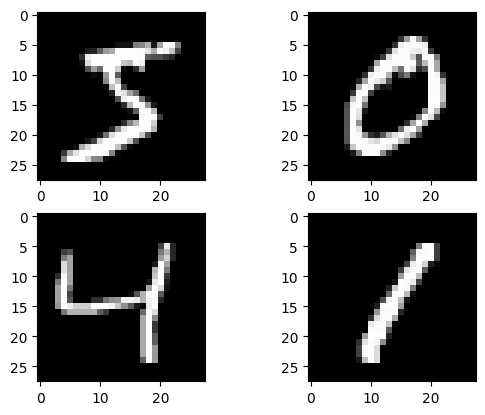

In [20]:
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0], cmap=plt.get_cmap('gray'))
ax[0][1].imshow(X_train[1], cmap=plt.get_cmap('gray'))
ax[1][0].imshow(X_train[2], cmap=plt.get_cmap('gray'))
ax[1][1].imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

# MLP (multi-layer perceptron, NN)

- Images are just sequences of lines...
- Could a simple MLP solve this task?

### Load

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


### Reshape & Rescale

In [22]:
num_pixels = X_train.shape[1] * X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') / 255 # will get a value from 0 to 1, flattens
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') / 255

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 784) (60000,)
Test:  (10000, 784) (10000,)


In [23]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### OneHot Encode the Label

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [25]:
print(y_train.shape, y_test.shape)
print(y_train[:4])

(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Build Model

- Create an MLP with one single hidden layer with 784 neurons.

In [26]:
def mlp_model():
  model = keras.Sequential([
   layers.Dense(num_pixels,
                input_dim=num_pixels,
                kernel_initializer='normal',
                activation='relu'),
    layers.Dense(num_classes,
                 kernel_initializer='normal',
                 activation='softmax')]) # basically assigns probability assuming that inputs are normally distributed
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [27]:
model = mlp_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Train Model

In [28]:
model = mlp_model()

early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
188/188 [==============================] - 3s 6ms/step - loss: 0.3314 - accuracy: 0.9071 - val_loss: 0.1642 - val_accuracy: 0.9547
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.1366 - accuracy: 0.9604 - val_loss: 0.1166 - val_accuracy: 0.9663
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0896 - accuracy: 0.9746 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0643 - accuracy: 0.9827 - val_loss: 0.0909 - val_accuracy: 0.9707
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9858 - val_loss: 0.0786 - val_accuracy: 0.9766
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 0.0805 - val_accuracy: 0.9764
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0275 - accuracy: 0.9930 - val_loss: 0.0771 - val_accuracy: 0.9775

## Evaluate Model Performance

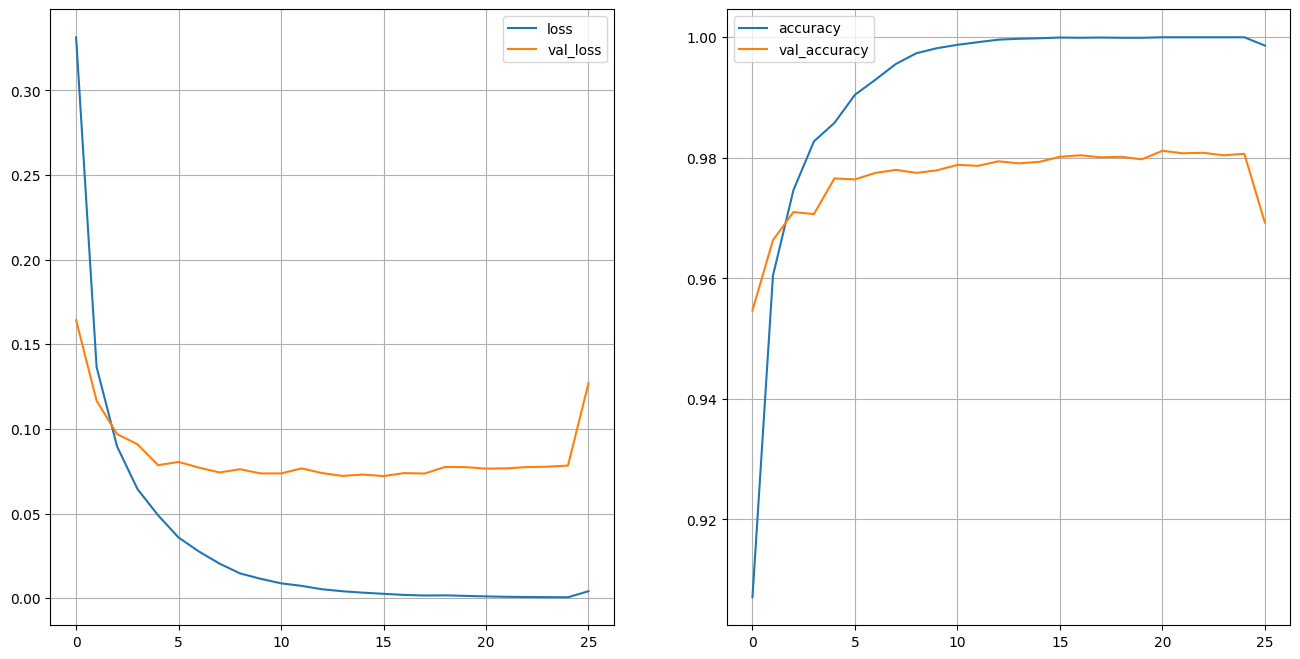

MLP Error: 1.73%


In [29]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("MLP Error: %.2f%%" % (100-scores[1]*100))

## Make Predictions

1/1 [==============================] - 0s 88ms/step
0 with probability of 0.00%
1 with probability of 0.00%
2 with probability of 0.00%
3 with probability of 0.00%
4 with probability of 0.00%
5 with probability of 0.00%
6 with probability of 99.99%
7 with probability of 0.01%
8 with probability of 0.00%
9 with probability of 0.00%
1/1 [==============================] - 0s 16ms/step


6

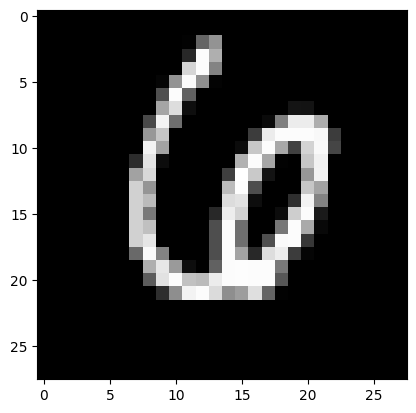

In [30]:
x = X_test[66]
plt.imshow(x.reshape(28, 28), cmap=plt.get_cmap('gray'))
for label, proba in enumerate(model.predict(x.reshape(1, -1))[0]): # trained batch wise and expects a similar batch of 784 pixels togethers
  print(f"{label} with probability of {proba*100:.2f}%")
np.argmax(model.predict(X_test[66].reshape(1, -1)))

## Analyse Failures

1/1 [==============================] - 0s 17ms/step
[2, 3, 1, 3, 2]


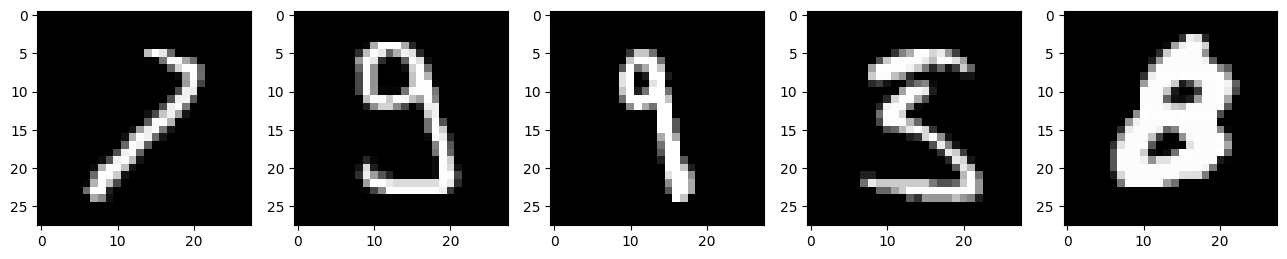

In [ ]:
N = 5
fig, ax = plt.subplots(1, N, figsize=(16, 4))
predictions = []
while len(predictions) < 5:
  i = random.randint(0, X_test.shape[0])
  if (np.argmax(model.predict(X_test[i].reshape(1, -1))) != np.argmax(y_test[i])):
    ax[len(predictions)].imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    predictions.append(np.argmax(model.predict(X_test[i].reshape(1, -1))))
print(predictions)
plt.show()

# Simple CNN

## Load

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


## Reshape & Rescale

- In Keras, when we use the TensorFlow backend, the layers used for two-dimensional convolutions expect pixel values with the dimensions [width][height][channels].

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255 # the one is because we only have 1 color, not the 3 colors of RGB
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28, 1) (60000,)
Test:  (10000, 28, 28, 1) (10000,)


## OneHot Encode the Label

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28, 1) (60000, 10)
Test:  (10000, 28, 28, 1) (10000, 10)


## Build Model

1. Convolutional layer with 32 feature maps, from 5 x 5 filters and ReLu activation function. This is the input layer, expecting images with the structure outline above, 28 x 28 x 1.

2. Pooling layer taking the max over 2 x 2 patches.

3. Dropout layer with a probability of 20%.

4. Flatten layer.

5. Fully connected layer with 128 neurons and rectifier activation function.

6. Dropout layer with a probability of 30%.

7. Output layer with 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [31]:
def simple_cnn():
  model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (5, 5), activation='relu'), # filters are 32, kernel size is 5 by 5
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(), # just puts your filters into a list
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = simple_cnn()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               589952    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

Notice the parameters are often right after a flatten.

## Train Model

In [ ]:
model = simple_cnn()

early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
188/188 [==============================] - 3s 9ms/step - loss: 0.3735 - accuracy: 0.8874 - val_loss: 0.1055 - val_accuracy: 0.9707
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.0753 - val_accuracy: 0.9778
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0806 - accuracy: 0.9755 - val_loss: 0.0574 - val_accuracy: 0.9827
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0635 - accuracy: 0.9811 - val_loss: 0.0471 - val_accuracy: 0.9861
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0534 - accuracy: 0.9838 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0411 - val_accuracy: 0.9872

## Evaluate Model Performance

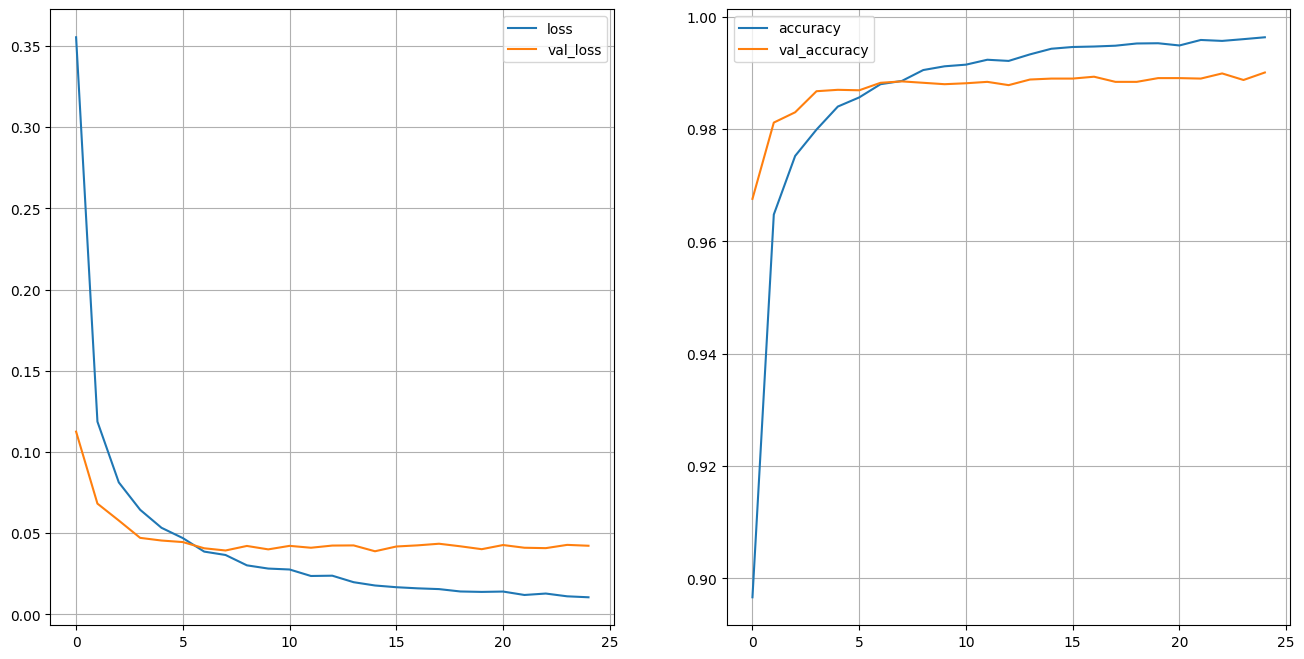

Simple CNN Error: 0.90%


In [ ]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple CNN Error: %.2f%%" % (100-scores[1]*100))

## Gradio 🖌️🎨

In [32]:
!pip install -qq gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 11.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into acc

In [33]:
import gradio as gr

def classify_digit(image):
  X = image['composite'][:, :, -1:].astype('float') / 255.0
  probas = model.predict(np.expand_dims(X, 0))[0]
  confidences = {i: proba for i, proba in enumerate(probas)}
  return confidences

interface = gr.Interface(fn=classify_digit,
                         inputs=gr.Sketchpad(sources=(),
                                             width=400,
                                             height=400,
                                             crop_size=(28, 28),
                                             image_mode="RGB",
                                             brush=gr.Brush(colors=["#0000FF"], color_mode="fixed")),
                         outputs=gr.Label(num_top_classes=3))

interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://aa8ec2bc9def6fcaef.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Challenge 🍫

Now you'll create, train and evaluate a model capable of close to state-of-the-art results. Here's a good topology to start with, take it from there:

  1. Convolutional layer with 32 feature maps of size 5 x 5.
  2. Pooling layer taking the max over 2 x 2 patches.
  3. Convolutional layer with 16 feature maps of size 3 x 3.
  4. Pooling layer taking the max over 2 x 2 patches.
  5. Dropout layer with a probability of 20%.
  6. Flatten layer.
  7. Fully connected layer with 128 neurons and rectifier activation.
  8. Fully connected layer with 64 neurons and rectifier activation.
  9. Output layer.

and win some chocolate 😋

<img src="https://shop.villars.com/1220-large_default/swiss-milk-chocolate-bar-with-coffee-pieces-100g.jpg" height="300px"/>

In [9]:
# your model definition here
model = keras.Sequential([
  layers.Input(shape=(28, 28, 1)),
  layers.Conv2D(32, (5, 5), activation='relu'), # filters are 32, kernel size is 5 by 5
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(), # just puts your filters into a list
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
188/188 [==============================] - 29s 147ms/step - loss: 0.4694 - accuracy: 0.8535 - val_loss: 0.1032 - val_accuracy: 0.9707
Epoch 2/100
188/188 [==============================] - 25s 135ms/step - loss: 0.1141 - accuracy: 0.9648 - val_loss: 0.0698 - val_accuracy: 0.9791
Epoch 3/100
188/188 [==============================] - 27s 145ms/step - loss: 0.0834 - accuracy: 0.9737 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 4/100
188/188 [==============================] - 25s 134ms/step - loss: 0.0668 - accuracy: 0.9782 - val_loss: 0.0576 - val_accuracy: 0.9826
Epoch 5/100
188/188 [==============================] - 26s 139ms/step - loss: 0.0553 - accuracy: 0.9830 - val_loss: 0.0508 - val_accuracy: 0.9861
Epoch 6/100
188/188 [==============================] - 25s 133ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0405 - val_accuracy: 0.9879
Epoch 7/100
188/188 [==============================] - 26s 139ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0417 -

KeyboardInterrupt: 

In [1]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple CNN Error: %.2f%%" % (100-scores[1]*100))

NameError: name 'pd' is not defined

In [ ]:
def classify_digit(image):
  X = image['composite'][:, :, -1:].astype('float') / 255.0
  probas = model.predict(np.expand_dims(X, 0))[0]
  confidences = {i: proba for i, proba in enumerate(probas)}
  return confidences

interface = gr.Interface(fn=classify_digit,
                         inputs=gr.Sketchpad(sources=(),
                                             width=400,
                                             height=400,
                                             crop_size=(28, 28),
                                             image_mode="RGB",
                                             brush=gr.Brush(colors=["#0000FF"], color_mode="fixed")),
                         outputs=gr.Label(num_top_classes=3))

interface.launch()

# Experiment 🧪

Could we have achieved this with smart feature engineering and ML ?

## PCA

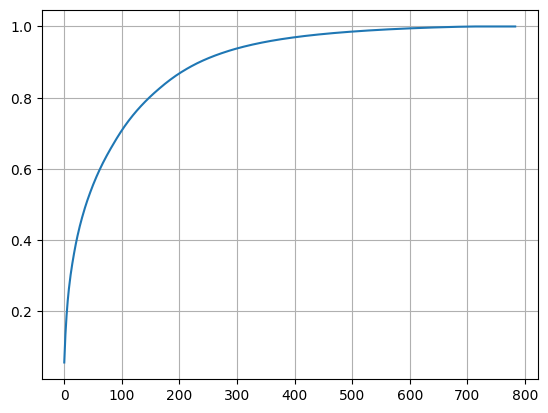

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:])).astype('float32')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

model = Pipeline([('std', StandardScaler()),
                  ('pca', PCA(X_train.shape[1]))])

model.fit(X_train)

plt.plot(np.cumsum(model.steps[1][1].explained_variance_ratio_))
plt.grid()

## PCA & KNN

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:])).astype('float32')
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:])).astype('float32')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = Pipeline([('std', StandardScaler()),
                  ('pca', PCA(100)),
                  ('knn', KNeighborsClassifier(n_neighbors=20))])

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9512

# UP NEXT
[EuroSAT](https://colab.research.google.com/drive/1G0DYPh2m0oB6RxflMuFBfz4x_eQN4Euz?usp=sharing)